In [2]:
from pandas import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV

#/////////////////////////////////////////////////////////
#feature selection for preparing machine learning data in Python with scikit-learn.
#   4 different automatic feature selection techniques:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import Binarizer 
from sklearn.feature_selection import SelectFromModel

C:\Users\RUBYu\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# Load dataset information
dt= pd.read_csv('Desktop/data/USIS-wamVer-2.csv')
#dt.head()
dt.shape

(2462, 10)

# target_dept was added to dataset and shuffled

In [4]:
dt.head()

,1st_choice,2nd_choice,3rd_choice,ssc_or_olevel,hsc_or_alevel,medium,ssc_board,hsc_board,registered_program,target_dept
0,ARC-1,CSE-2,CS-3,4.8,4.50,eng,NaN,NaN,ARC,Architecture
1,ECE-1,EEE-2,CSE-3,5.0,4.08,ban,NaN,NaN,ECE,ElectricalandElectronicEngr
2,BIO-1,CSE-2,BBA-3,5.0,5.00,eng-ver,Dhaka,Dhaka,BIO,MNS
3,ARC-1,BIO-2,EEE-3,5.0,5.00,eng,NaN,NaN,BIO,MNS
4,ARC-1,LLB-2,NaN,4.6,NaN,eng,NaN,NaN,LLB,School_of_Law


In [5]:
dt['target_dept'].value_counts()

MNS                            469
ComputerSciandEngr             400
ElectricalandElectronicEngr    334
ESS                            260
Brac_Business_School           200
Pharmacy                       200
School_of_Law                  200
Architecture                   200
ENH                            199
Name: target_dept, dtype: int64

In [6]:
dt['registered_program'].value_counts()

CSE    200
CS     200
EEE    200
LLB    200
ARC    200
BBA    200
PHR    200
ENG    199
ECO    199
MIC    197
BIO    196
ECE    134
ANT     61
PHY     33
APE     25
MAT     18
Name: registered_program, dtype: int64

# Data Mapping

In [7]:
dt.columns

Index(['1st_choice', '2nd_choice', '3rd_choice', 'ssc_or_olevel',
       'hsc_or_alevel', 'medium', 'ssc_board', 'hsc_board',
       'registered_program', 'target_dept'],
      dtype='object')

In [8]:
#check how many unique values - method
# including empty val counted as a separate catagory
for col_name in dt.columns:
    if dt[col_name].dtypes == 'object':
        unique_cat = len(dt[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique catagories".format(
             col_name=col_name, unique_cat= unique_cat))

Feature '1st_choice' has 16 unique catagories
Feature '2nd_choice' has 17 unique catagories
Feature '3rd_choice' has 17 unique catagories
Feature 'medium' has 4 unique catagories
Feature 'ssc_board' has 12 unique catagories
Feature 'hsc_board' has 12 unique catagories
Feature 'registered_program' has 16 unique catagories
Feature 'target_dept' has 9 unique catagories


In [9]:
map_obj={"1st_choice":{"ANT-1":1,"APE-1":2,"ARC-1":3,"BBA-1":4,"BIO-1":5,"CS-1":6,"CSE-1":7,"ECE-1":8,"ECO-1":9,
                      "EEE-1":10,"ENG-1":11,"LLB-1":12,"MAT-1":13,"MIC-1":14,"PHR-1":15,"PHY-1":16}  ,
        "2nd_choice":{"ANT-2":1,"APE-2":2,"ARC-2":3,"BBA-2":4,"BIO-2":5,"CS-2":6,"CSE-2":7,"ECE-2":8,"ECO-2":9,
                      "EEE-2":10,"ENG-2":11,"LLB-2":12,"MAT-2":13,"MIC-2":14,"PHR-2":15,"PHY-2":16} ,
        "3rd_choice":{"ANT-3":1,"APE-3":2,"ARC-3":3,"BBA-3":4,"BIO-3":5,"CS-3":6,"CSE-3":7,"ECE-3":8,"ECO-3":9,
                      "EEE-3":10,"ENG-3":11,"LLB-3":12,"MAT-3":13,"MIC-3":14,"PHR-3":15,"PHY-3":16}    ,
        "registered_program":{"ANT":1,"APE":2,"ARC":3,"BBA":4,"BIO":5,"CS":6,"CSE":7,"ECE":8,"ECO":9,
                      "EEE":10,"ENG":11,"LLB":12,"MAT":13,"MIC":14,"PHR":15,"PHY":16}   ,
        "ssc_board":{"Barisal":1,"CBSE":2,"Chittagong":3,"Comilla":4,"Dhaka":5,"Dinajpur":6,"Jessore":7,
                     "Madrasah":8,"Others":9,"Rajshahi":10,"Sylhet":11},
        "hsc_board":{"Barisal":1,"CBSE":2,"Chittagong":3,"Comilla":4,"Dhaka":5,"Dinajpur":6,"Jessore":7,
                     "Madrasah":8,"Others":9,"Rajshahi":10,"Sylhet":11}    ,
        "medium":{"ban":1,"eng":2,"eng-ver":3,"madrasah":4},
        "target_dept":{"MNS":1,"ComputerSciandEngr":2,"ElectricalandElectronicEngr":3,"ESS":4,"ENH":5,
                      "Brac_Business_School":6,"School_of_Law":7,"Architecture":8,"Pharmacy":9}
        }
dt.replace(map_obj,inplace=True)

In [10]:
dt.head()

,1st_choice,2nd_choice,3rd_choice,ssc_or_olevel,hsc_or_alevel,medium,ssc_board,hsc_board,registered_program,target_dept
0,3,7.0,6.0,4.8,4.50,2,NaN,NaN,3,8
1,8,10.0,7.0,5.0,4.08,1,NaN,NaN,8,3
2,5,7.0,4.0,5.0,5.00,3,5.0,5.0,5,1
3,3,5.0,10.0,5.0,5.00,2,NaN,NaN,5,1
4,3,12.0,NaN,4.6,NaN,2,NaN,NaN,12,7


# Empty value handling

In [11]:
dt.isnull().sum().sort_values(ascending=False)

3rd_choice            1111
hsc_board              590
ssc_board              581
hsc_or_alevel          330
ssc_or_olevel          233
2nd_choice              57
target_dept              0
registered_program       0
medium                   0
1st_choice               0
dtype: int64

In [12]:
#Impute missing values using Imputer in aklearn.preprocessing
from sklearn.preprocessing import Imputer

imp= Imputer(missing_values= 'NaN', strategy='median', axis=0) 
#median posses no issue cause ssc/olevel result is now in one col -
#manually and another feature "medium" was added manually
imp.fit(dt)
dt= pd.DataFrame(data=imp.transform(dt),columns=dt.columns)

#now check again for null if any
dt.isnull().sum().sort_values(ascending=False).head(6)

target_dept           0
registered_program    0
hsc_board             0
ssc_board             0
medium                0
hsc_or_alevel         0
dtype: int64

# split data to train - test set

In [13]:
x = dt.drop('target_dept',1)
y = dt.target_dept

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.20)

In [31]:
X_train.shape

(1969, 9)

In [32]:
X_test.shape

(493, 9)

# Model accuracy score

In [33]:
sizes=[]
names = ["KNN", "Logistic Regression","Linear SVM",
         "Decision Tree", "Random Forest", "AdaBoost","Naive Bayes"]

classifiers = [
    KNeighborsClassifier(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB()
]

# iterate over classifiers
for name, clf in zip(names, classifiers):
    # ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    score = accuracy_score(pred,y_test)
    print("-----",name,"-----")
    result = (score*100)
    sizes.append(result)
    print("Score: %.2f %%"%(score*100))
    print("\n")
   

----- KNN -----
Score: 78.90 %


----- Logistic Regression -----
Score: 41.58 %


----- Linear SVM -----
Score: 86.00 %


----- Decision Tree -----
Score: 100.00 %


----- Random Forest -----
Score: 98.58 %


----- AdaBoost -----
Score: 33.27 %


----- Naive Bayes -----
Score: 66.94 %




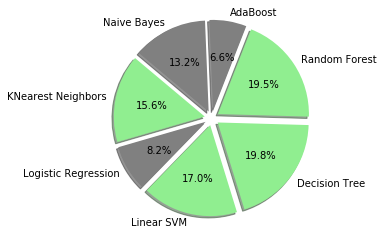

In [34]:
sizes=sizes
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'KNearest Neighbors','Logistic Regression', 'Linear SVM','Decision Tree', 'Random Forest', 'AdaBoost','Naive Bayes'

explode = (0.08, 0.08, 0.08, 0.08,0.08,0.08,0.08)
colors = ['lightgreen', 'grey', 'lightgreen', 'lightgreen','lightgreen','grey','grey']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140,colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()